In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data =pd.read_csv("farms_train.csv", sep =";")



   DIFF     R2     R7      R8     R17     R22     R32
0   0.0  0,705   0,29  0,1334  0,0481  0,5258  0,2941
1   1.0  0,801  0,213  0,1282  0,0186  2,1411  0,3005
2   1.0  0,591  0,429  0,2999    0,08  0,5957  0,4126
3   0.0  0,373  0,346  1,3704  0,0812   0,343  0,2265
4   0.0      0  1,417  0,2493  0,0501  0,8728  0,1086
             DIFF
count  303.000000
mean     0.524752
std      0.500213
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [9]:
# Afficher les 5 premières lignes pour avoir un aperçu des données
print(data.head())

# Afficher un résumé des colonnes et des types de données
print(data.info())

# Afficher des statistiques descriptives pour les données numériques
print(data.describe())

summary = data.describe()
print(summary)


   DIFF     R2     R7      R8     R17     R22     R32
0   0.0  0,705   0,29  0,1334  0,0481  0,5258  0,2941
1   1.0  0,801  0,213  0,1282  0,0186  2,1411  0,3005
2   1.0  0,591  0,429  0,2999    0,08  0,5957  0,4126
3   0.0  0,373  0,346  1,3704  0,0812   0,343  0,2265
4   0.0      0  1,417  0,2493  0,0501  0,8728  0,1086
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIFF    303 non-null    float64
 1   R2      303 non-null    object 
 2   R7      303 non-null    object 
 3   R8      303 non-null    object 
 4   R17     303 non-null    object 
 5   R22     303 non-null    object 
 6   R32     303 non-null    object 
dtypes: float64(1), object(6)
memory usage: 51.8+ KB
None
             DIFF
count  303.000000
mean     0.524752
std      0.500213
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000
             DIFF
c

In [10]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Calculer le pourcentage de valeurs manquantes
print(data.isnull().mean() * 100)


DIFF    642
R2      642
R7      642
R8      642
R17     642
R22     642
R32     642
dtype: int64
DIFF    67.936508
R2      67.936508
R7      67.936508
R8      67.936508
R17     67.936508
R22     67.936508
R32     67.936508
dtype: float64


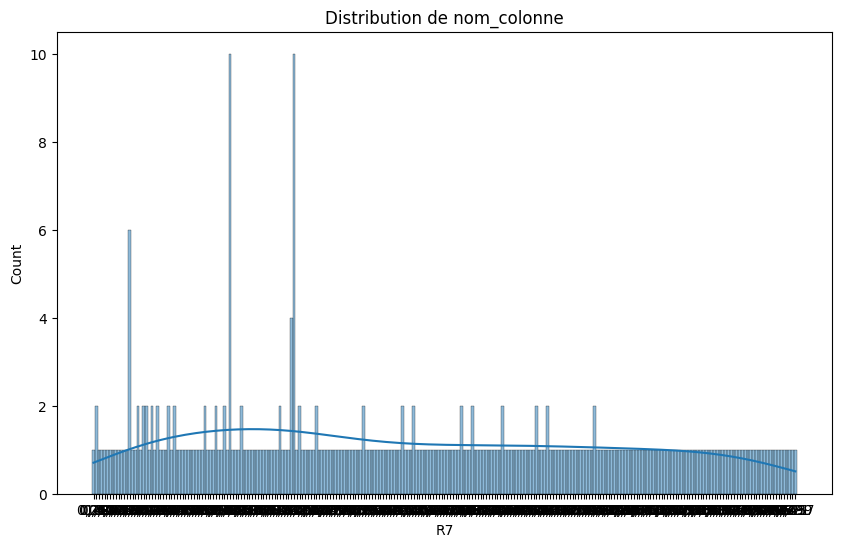

In [12]:
# Histogramme pour une colonne spécifique
plt.figure(figsize=(10,6))
sns.histplot(data["R7"], kde=True)  # Remplacer 'nom_colonne' par le nom de la colonne
plt.title('Distribution de nom_colonne')
plt.show()


<ipython-input-16-7e8a065c9188>:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


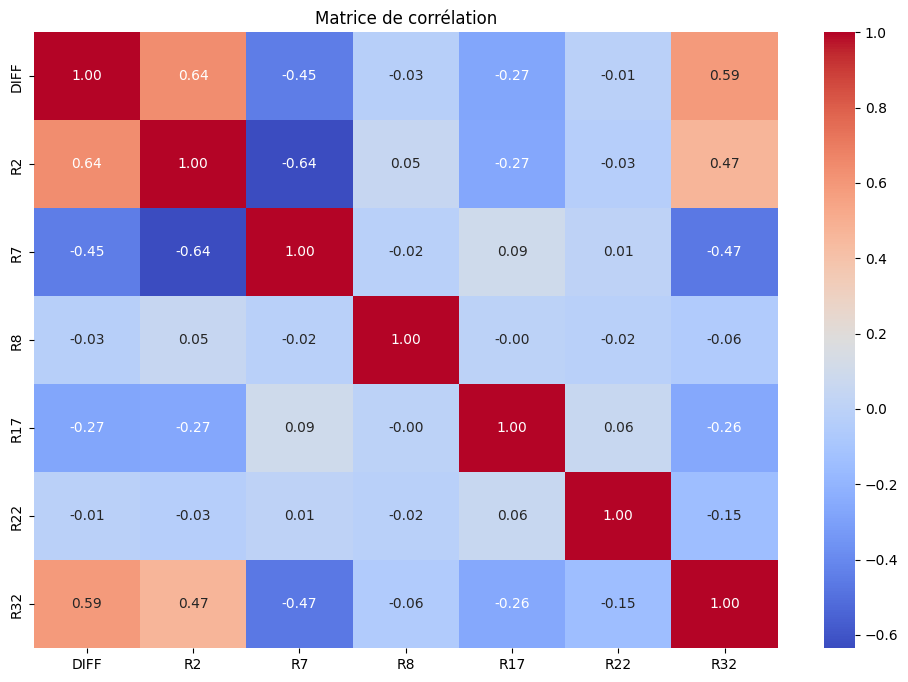

In [16]:
# Remplacer les virgules par des points dans tout le DataFrame
data = data.apply(lambda x: x.str.replace(',', '.') if x.dtype == 'object' else x)

# Convertir toutes les colonnes en type numérique (au cas où cela n'a pas été fait)
data = data.apply(pd.to_numeric, errors='ignore')

# Maintenant, tu peux calculer la matrice de corrélation
corr = data.corr()

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()



In [14]:
# Supprimer les lignes avec des valeurs manquantes
data_cleaned = data.dropna()


In [17]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Imputer les valeurs manquantes avec la moyenne uniquement pour les colonnes numériques
data_filled = data.copy()  # Créer une copie pour ne pas écraser les données originales
data_filled[numeric_columns] = data_filled[numeric_columns].fillna(data_filled[numeric_columns].mean())

# Vérifier le résultat
print(data_filled.head())


   DIFF     R2     R7      R8     R17     R22     R32
0   0.0  0.705  0.290  0.1334  0.0481  0.5258  0.2941
1   1.0  0.801  0.213  0.1282  0.0186  2.1411  0.3005
2   1.0  0.591  0.429  0.2999  0.0800  0.5957  0.4126
3   0.0  0.373  0.346  1.3704  0.0812  0.3430  0.2265
4   0.0  0.000  1.417  0.2493  0.0501  0.8728  0.1086


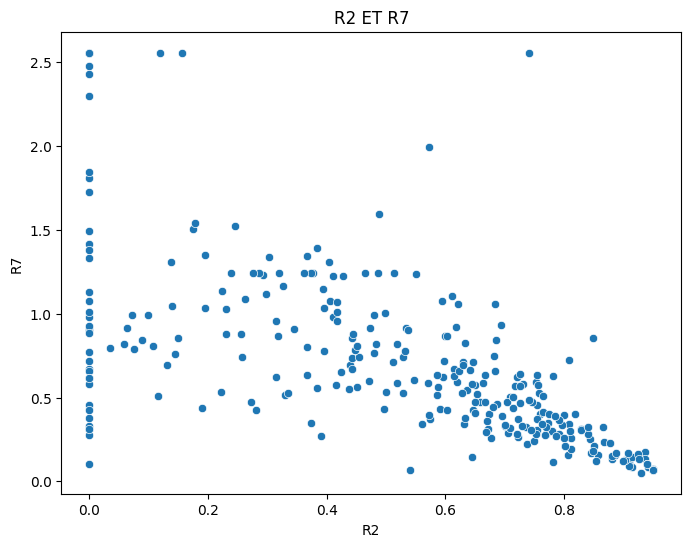

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='R2', y='R7', data=data)
plt.title('R2 ET R7')
plt.show()
